# Filtro en imágenes a traves de autoencoders

In [1]:
# Descargando las librerías
import numpy as np
import matplotlib.pyplot as plt
# import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils as image_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend, optimizers

In [2]:
# Descargando únicamente las imágenes de entrenamiento
(x_train, _), (x_test, _) = mnist.load_data()

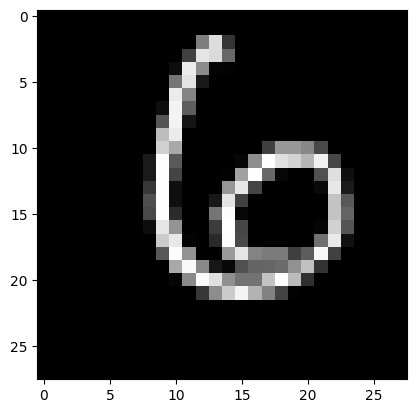

In [3]:
# Inspección visual de las imágenes
prueba = x_test[100]
plt.imshow(prueba, cmap='gray')
plt.show()

## Preprocesaiento de las imágenes

In [4]:
# Escalamiento de las imágenes
x_train = x_train/255
x_test = x_test/255

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
# Adición de ruido a las imágenes preprocesadas
razon_ruido = 0.7
x_test_ruido = x_test + razon_ruido * np.random.rand(10000, 28, 28)

In [7]:
# Limitando los valores de las imágenes con ruido
x_test_ruido = np.clip(x_test_ruido, 0, 1)

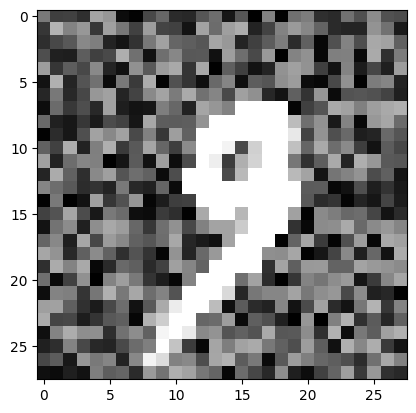

In [8]:
# Visualización de las imágenes con ruido
prueba = x_test_ruido[1000]
plt.imshow(prueba, cmap='gray')
plt.show()

In [9]:
# Redimensionamiento de los vectores de imágenes
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_test_ruido = x_test_ruido.reshape(10000, 784)

## Construcción del modelo

In [10]:
# Instrucción para eliminar la información de modelos previos
backend.clear_session()

In [11]:
# Definición del modelo
autoencoder = Sequential()
autoencoder.add(Dense(392, activation = 'relu', input_shape = (784, )))
autoencoder.add(Dense(100, activation = 'relu'))
autoencoder.add(Dense(392, activation = 'relu'))
autoencoder.add(Dense(784, activation = 'sigmoid'))

autoencoder.summary()

Metal device set to: Apple M2 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 100)               39300     
                                                                 
 dense_2 (Dense)             (None, 392)               39592     
                                                                 
 dense_3 (Dense)             (None, 784)               308112    
                                                                 
Total params: 694,724
Trainable params: 694,724
Non-trainable params: 0
_________________________________________________________________


2024-03-19 23:06:31.332652: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-19 23:06:31.332762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# Compilación del modelo
Adam = optimizers.Adam(learning_rate = 0.001)
autoencoder.compile(optimizer = Adam, loss = 'mean_squared_error', metrics = ['mse'])

In [13]:
# Entrenamiento del modelo
M = autoencoder.fit(x_train, x_train,
                    validation_data=(x_test, x_test),
                    epochs=10,
                    batch_size=128,
                    verbose=True)

Epoch 1/10


2024-03-19 23:06:31.567815: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-19 23:06:31.687286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.0341 - mse: 0.0341

2024-03-19 23:06:34.538914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 6ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0047 - mse:

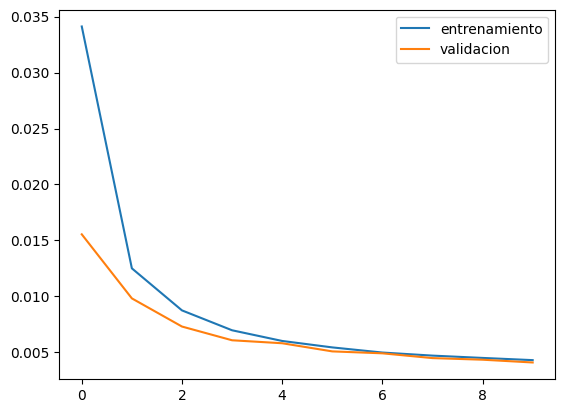

In [14]:
# Grafica del error del modelo
plt.plot(M.history['mse'], label ='entrenamiento')
plt.plot(M.history['val_mse'], label ='validacion')
plt.legend(loc='best')
plt.show()

1/1 [==============================] - 0s 54ms/step


2024-03-19 23:06:56.562566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


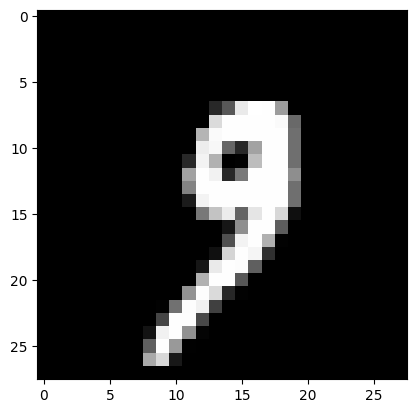

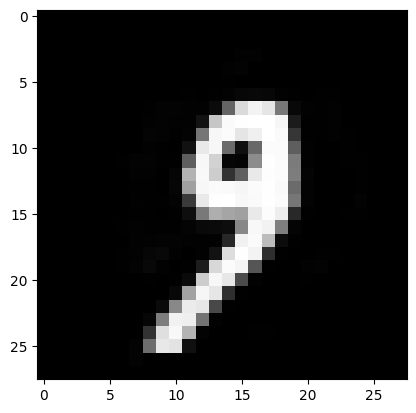

In [15]:
# Prueba del autoencoder
n_imagen = 1000
imagen = autoencoder.predict(x_test[n_imagen].reshape(1, 784))
plt.imshow(x_test[n_imagen].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(imagen.reshape(28,28), cmap='gray')
plt.show()

1/1 [==============================] - 0s 10ms/step


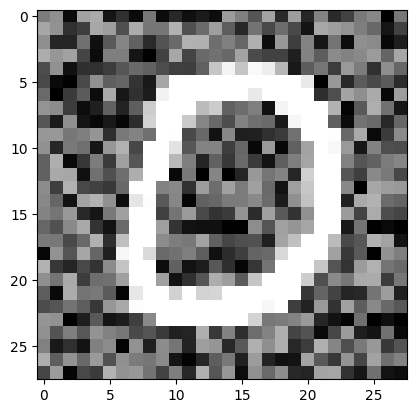

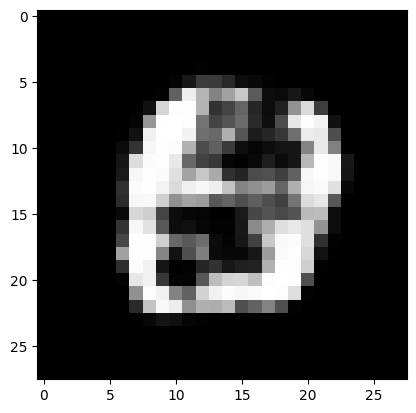

In [16]:
# Prueba del autoencoder
n_imagen = 10
imagen = autoencoder.predict(x_test_ruido[n_imagen].reshape(1, 784))
plt.imshow(x_test_ruido[n_imagen].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(imagen.reshape(28,28), cmap='gray')
plt.show()

Pruebas con otras imagenes

1/1 [==============================] - 0s 15ms/step


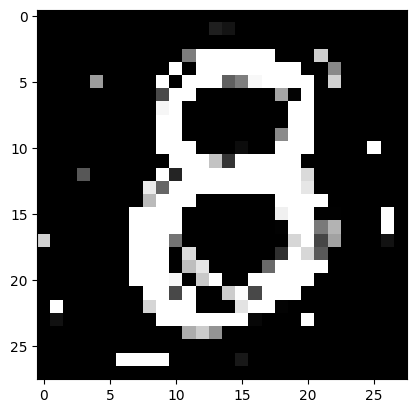

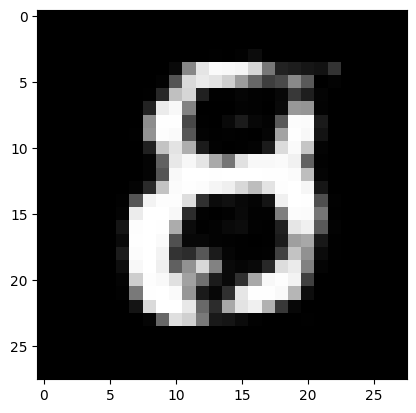

In [18]:
img = image_utils.load_img('8.png', target_size=(28,28), color_mode='grayscale')
img2 = image_utils.img_to_array(img)
img3 = img2/255
imagenPrep = autoencoder.predict(img3.reshape(1,784))
plt.imshow(img3, cmap='gray')
plt.show()
plt.imshow(imagenPrep.reshape(28,28), cmap='gray')
plt.show()